## Evaluating the Walkability of the Pedestrian Built-Environment using Geographic Information Systems



### Workbook Objectives

*   Create visualisation from the analyzed and processed dataset
*   Map creation


In [4]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
import geopandas as gpd
import folium
import json
warnings.filterwarnings('ignore')



In [5]:
# Paths to data to create dataframe

path = r"https://raw.githubusercontent.com/nehrou/walkability/main/20231221_134921_pedDataframe.csv"

pedDataframe = pd.read_csv(path)

pedDataframe = pedDataframe[['OBJECTID','PED_NAME','PER_SCORE','TRAF_SCORE','SAFETY','CON_SCO','UNI_SCORE','CON_SCORE','FAC_SCORE','DEST_SCORE','COM_SCORE','AES_SCORE','WALK_TSCORE','WALK_CATEGORY','SHAPE_Length']]

pedDataframe.head(15)

,OBJECTID,PED_NAME,PER_SCORE,TRAF_SCORE,SAFETY,CON_SCO,UNI_SCORE,CON_SCORE,FAC_SCORE,DEST_SCORE,COM_SCORE,AES_SCORE,WALK_TSCORE,WALK_CATEGORY,SHAPE_Length
0,1,CROSSWALK,0.0,1.5,1.5,0,1.0,1.0,1,1,4.0,4.0,1.73,GOOD,6.932738
1,2,SIDEWALK,0.0,1.5,1.5,0,2.0,2.0,0,0,3.0,3.0,1.35,GOOD,5.299458
2,3,SIDEWALK,0.0,0.5,0.5,0,2.0,2.0,0,0,2.5,2.5,0.77,EXCELLENT,7.822507
3,4,MISSING CONNECTION,0.5,0.0,0.5,0,3.0,3.0,1,1,2.5,2.5,1.54,GOOD,7.552591
4,5,SIDEWALK,0.5,1.5,2.0,0,2.0,2.0,1,1,2.0,2.0,1.54,GOOD,7.333319
5,6,MISSING CONNECTION,2.5,1.5,4.0,1,2.0,3.0,2,2,4.0,4.0,3.85,POOR,15.533449
6,7,SIDEWALK,0.5,4.5,5.0,1,2.0,3.0,1,1,3.0,3.0,3.46,POOR,33.534280
7,8,SIDEWALK,2.5,0.5,3.0,1,3.0,4.0,2,2,4.5,4.5,4.04,VERY POOR,68.908400
8,9,SIDEWALK,1.5,4.5,6.0,1,2.0,3.0,2,2,4.0,4.0,4.62,VERY POOR,43.995475
9,10,MISSING CONNECTION,3.0,2.5,5.5,0,3.0,3.0,2,2,3.0,3.0,4.04,VERY POOR,5.354191


Network Traffic Safety Score and Individual Security Score

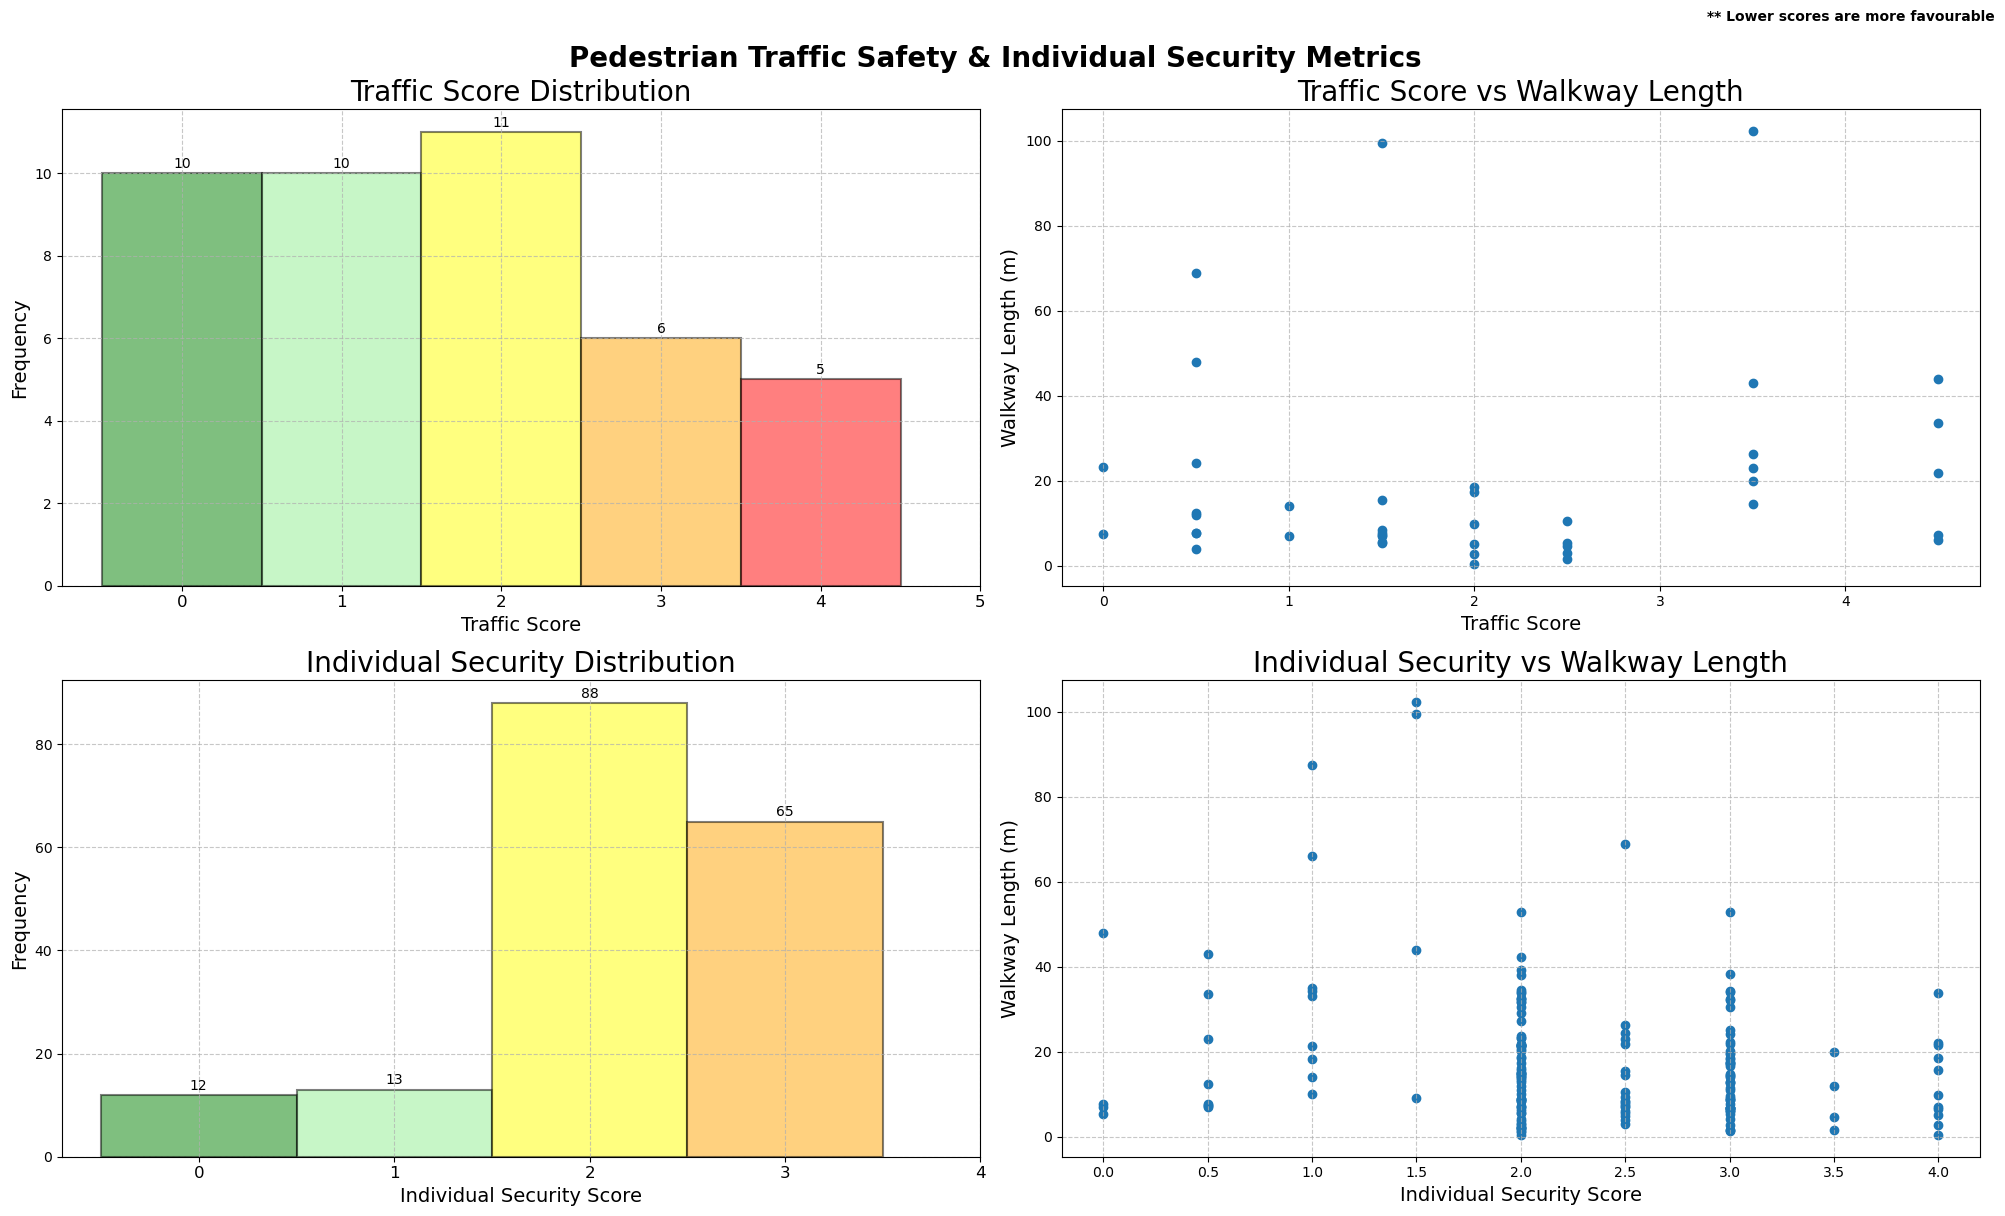

In [6]:

# Define bin edges for TRAF_SCORE from 0 to the max TRAF_SCORE plus 1, in steps of 1
bin_edges_traf = np.arange(0, max(pedDataframe['TRAF_SCORE']) + 1, 1)

# Define bin edges for PER_SCORE from 0 to the max PER_SCORE plus 1, in steps of 1
bin_edges_per = np.arange(0, max(pedDataframe['PER_SCORE']) + 1, 1)


# Create a figure and a set of subplots with 2 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12) )


fig.suptitle('Pedestrian Traffic Safety & Individual Security Metrics', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower scores are more favourable', ha='right', fontsize=10, fontweight='bold')


# Plotting the histogram for TRAF_SCORE
counts_traf, bins_traf, patches_traf = axes[0,0].hist(x=pedDataframe['TRAF_SCORE'], bins=bin_edges_traf, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[0,0].grid(True, linestyle='--', alpha=0.7)
axes[0,0].set_xlabel('Traffic Score', fontsize=14)
axes[0,0].set_ylabel('Frequency', fontsize=14)
axes[0,0].set_title('Traffic Score Distribution', fontsize=20)
axes[0,0].set_xticks(bin_edges_traf + 0.5)
axes[0,0].set_xticklabels(['0', '1', '2', '3', '4', '5'], fontsize=12)


# Color code by score for TRAF_SCORE
colors_traf = ['green', 'lightgreen', 'yellow', 'orange', 'red']
for score_bin, patch in zip(range(5), patches_traf):
    patch.set_facecolor(colors_traf[score_bin])

# Annotating the histogram for TRAF_SCORE
for count, patch in zip(counts_traf, patches_traf):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_traf)
    axes[0,0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)


# Scatterplot for Traffic Score vs Length
axes[0,1].scatter(pedDataframe['TRAF_SCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[0,1].grid(True, linestyle='--', alpha=0.7)
axes[0,1].set_xlabel('Traffic Score', fontsize=14)
axes[0,1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[0,1].set_title('Traffic Score vs Walkway Length', fontsize=20)



# Plotting the histogram for PER_SCORE
counts_per, bins_per, patches_per = axes[1,0].hist(x=pedDataframe['PER_SCORE'], bins=bin_edges_per, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[1,0].grid(True, linestyle='--', alpha=0.7)
axes[1,0].set_xlabel('Individual Security Score', fontsize=14)
axes[1,0].set_ylabel('Frequency', fontsize=14)
axes[1,0].set_title('Individual Security Distribution', fontsize=20)
axes[1,0].set_xticks(bin_edges_per + 0.5)
axes[1,0].set_xticklabels(['0', '1', '2', '3', '4'], fontsize=12)


# Color code by score for PER_SCORE
colors_per = ['green', 'lightgreen', 'yellow', 'orange', 'red']
for score_bin, patch in zip(range(len(bin_edges_per) - 1), patches_per):
    patch.set_facecolor(colors_per[score_bin])

# Annotating the histogram for PER_SCORE
for count, patch in zip(counts_per, patches_per):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_per)
    axes[1,0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)


# Scatterplot for Individual Security vs Length
axes[1,1].scatter(pedDataframe['PER_SCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1,1].grid(True, linestyle='--', alpha=0.7)
axes[1,1].set_xlabel('Individual Security Score', fontsize=14)
axes[1,1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1,1].set_title('Individual Security vs Walkway Length', fontsize=20)



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Derived Network Safety Ratings

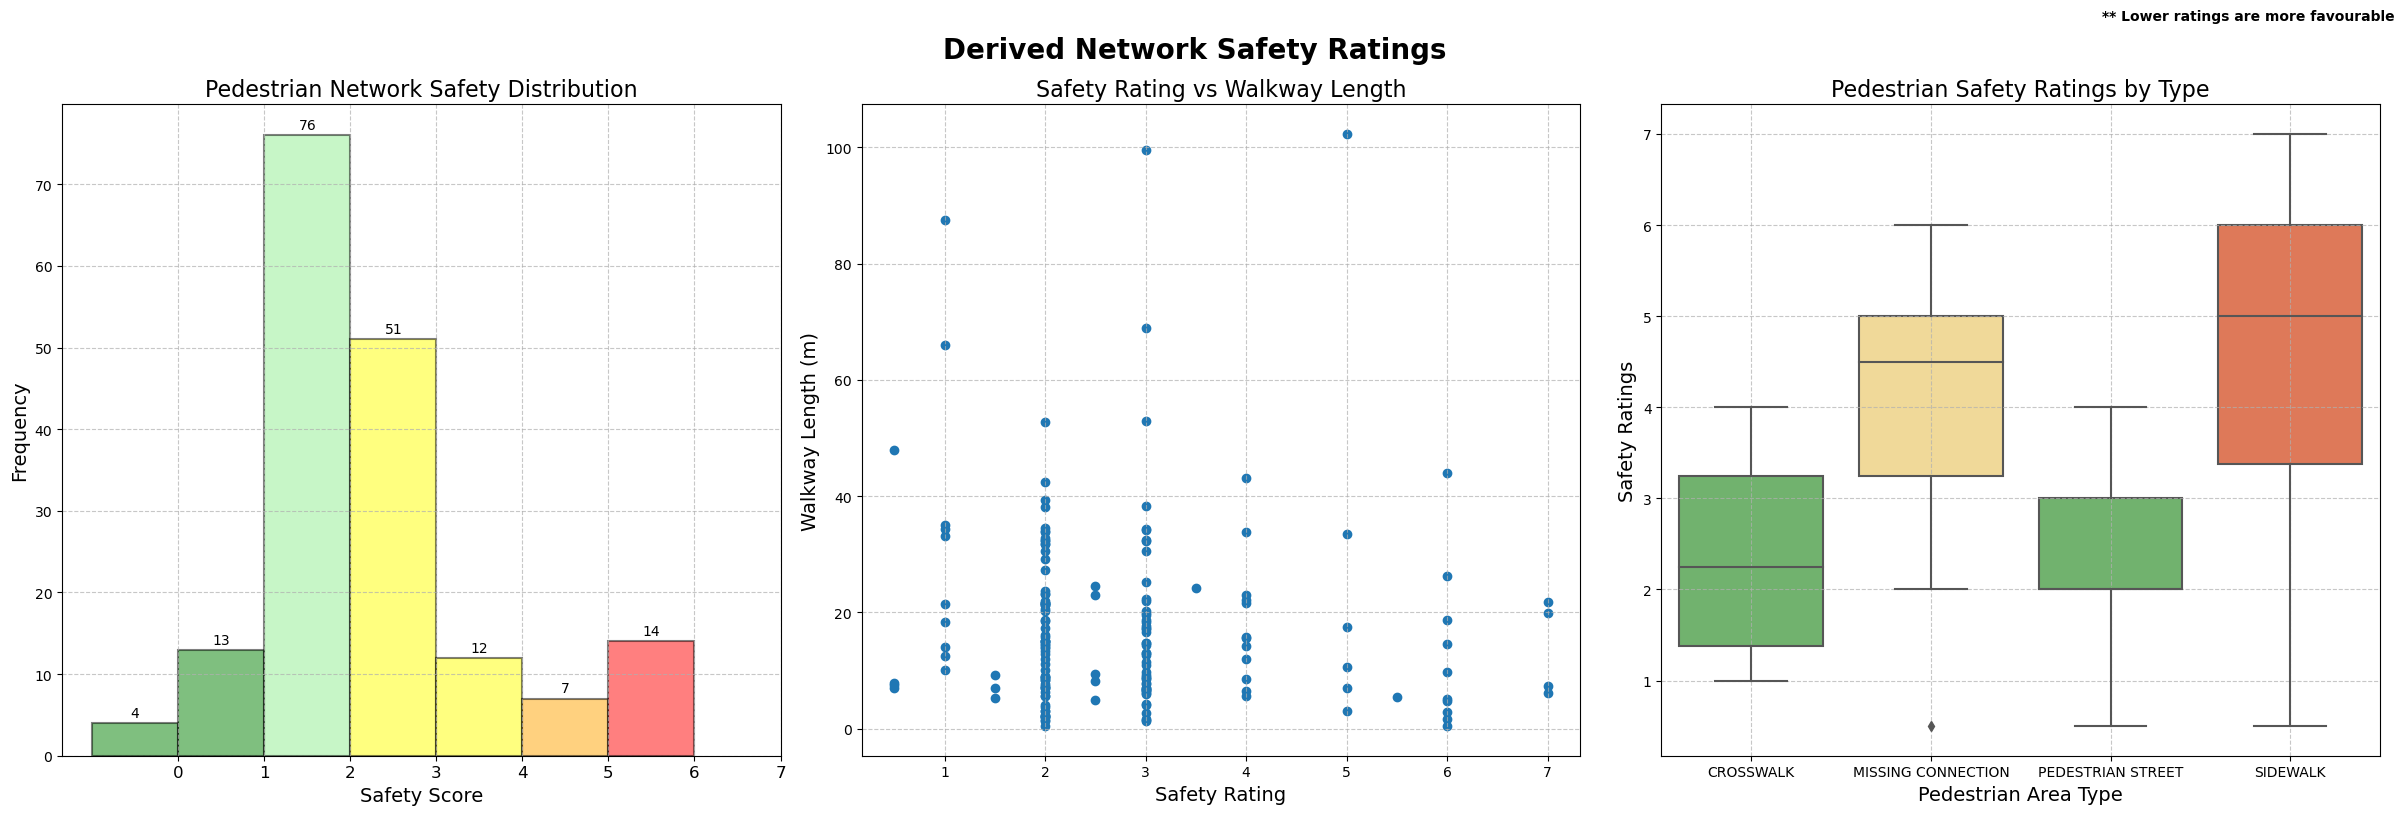

In [7]:
# Define bin edges for SAFETY from 0 to the max SAFETY plus 1, in steps of 1
bin_edges_saf = np.arange(0, max(pedDataframe['SAFETY']) + 1, 1)


# Create a figure and a set of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8) )

fig.suptitle('Derived Network Safety Ratings', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower ratings are more favourable', ha='right', fontsize=10, fontweight='bold')

# Plotting the histogram for SAFETY
counts_saf, bins_saf, patches_saf = axes[0].hist(x=pedDataframe['SAFETY'], bins=bin_edges_saf, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Safety Score', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].set_title('Pedestrian Network Safety Distribution', fontsize=16)
axes[0].set_xticks(bin_edges_saf + 1)
axes[0].set_xticklabels(['0', '1', '2', '3', '4','5','6','7'], fontsize=12)

# Color code by score for SAFETY
colors_saf = ['green', 'green','lightgreen','yellow', 'yellow', 'orange', 'red', 'red']
for score_bin, patch in zip(range(len(bin_edges_saf) - 1), patches_saf):
    patch.set_facecolor(colors_saf[score_bin])

# Annotating the histogram for SAFETY
for count, patch in zip(counts_saf, patches_saf):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_saf)
    axes[0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)


# Scatterplot for Safety vs Length
axes[1].scatter(pedDataframe['SAFETY'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Safety Rating', fontsize=14)
axes[1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1].set_title('Safety Rating vs Walkway Length', fontsize=16)


# Boxplot creation 
    
boxData = pedDataframe[['PED_NAME','SAFETY']]
grouped = boxData.groupby('PED_NAME')['SAFETY'].median()#.sort_values(ascending = False)

# Create a color palette from green (good) to red (bad)

palette = sns.color_palette("RdYlGn_r", len(grouped))

# Normalize the metric to get values between 0 and 1

normalized = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Prepare a color mapping based on normalized metric

color_mapping = normalized.apply(lambda x: palette[int(x * (len(palette) - 1))])

sns.boxplot(x='PED_NAME', y='SAFETY', data=boxData, order=color_mapping.index, palette=color_mapping,ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xlabel('Pedestrian Area Type', fontsize=14)
axes[2].set_ylabel('Safety Ratings', fontsize=14)
axes[2].set_title('Pedestrian Safety Ratings by Type', fontsize=16)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Pedestrian Convenience & Universality Metrics

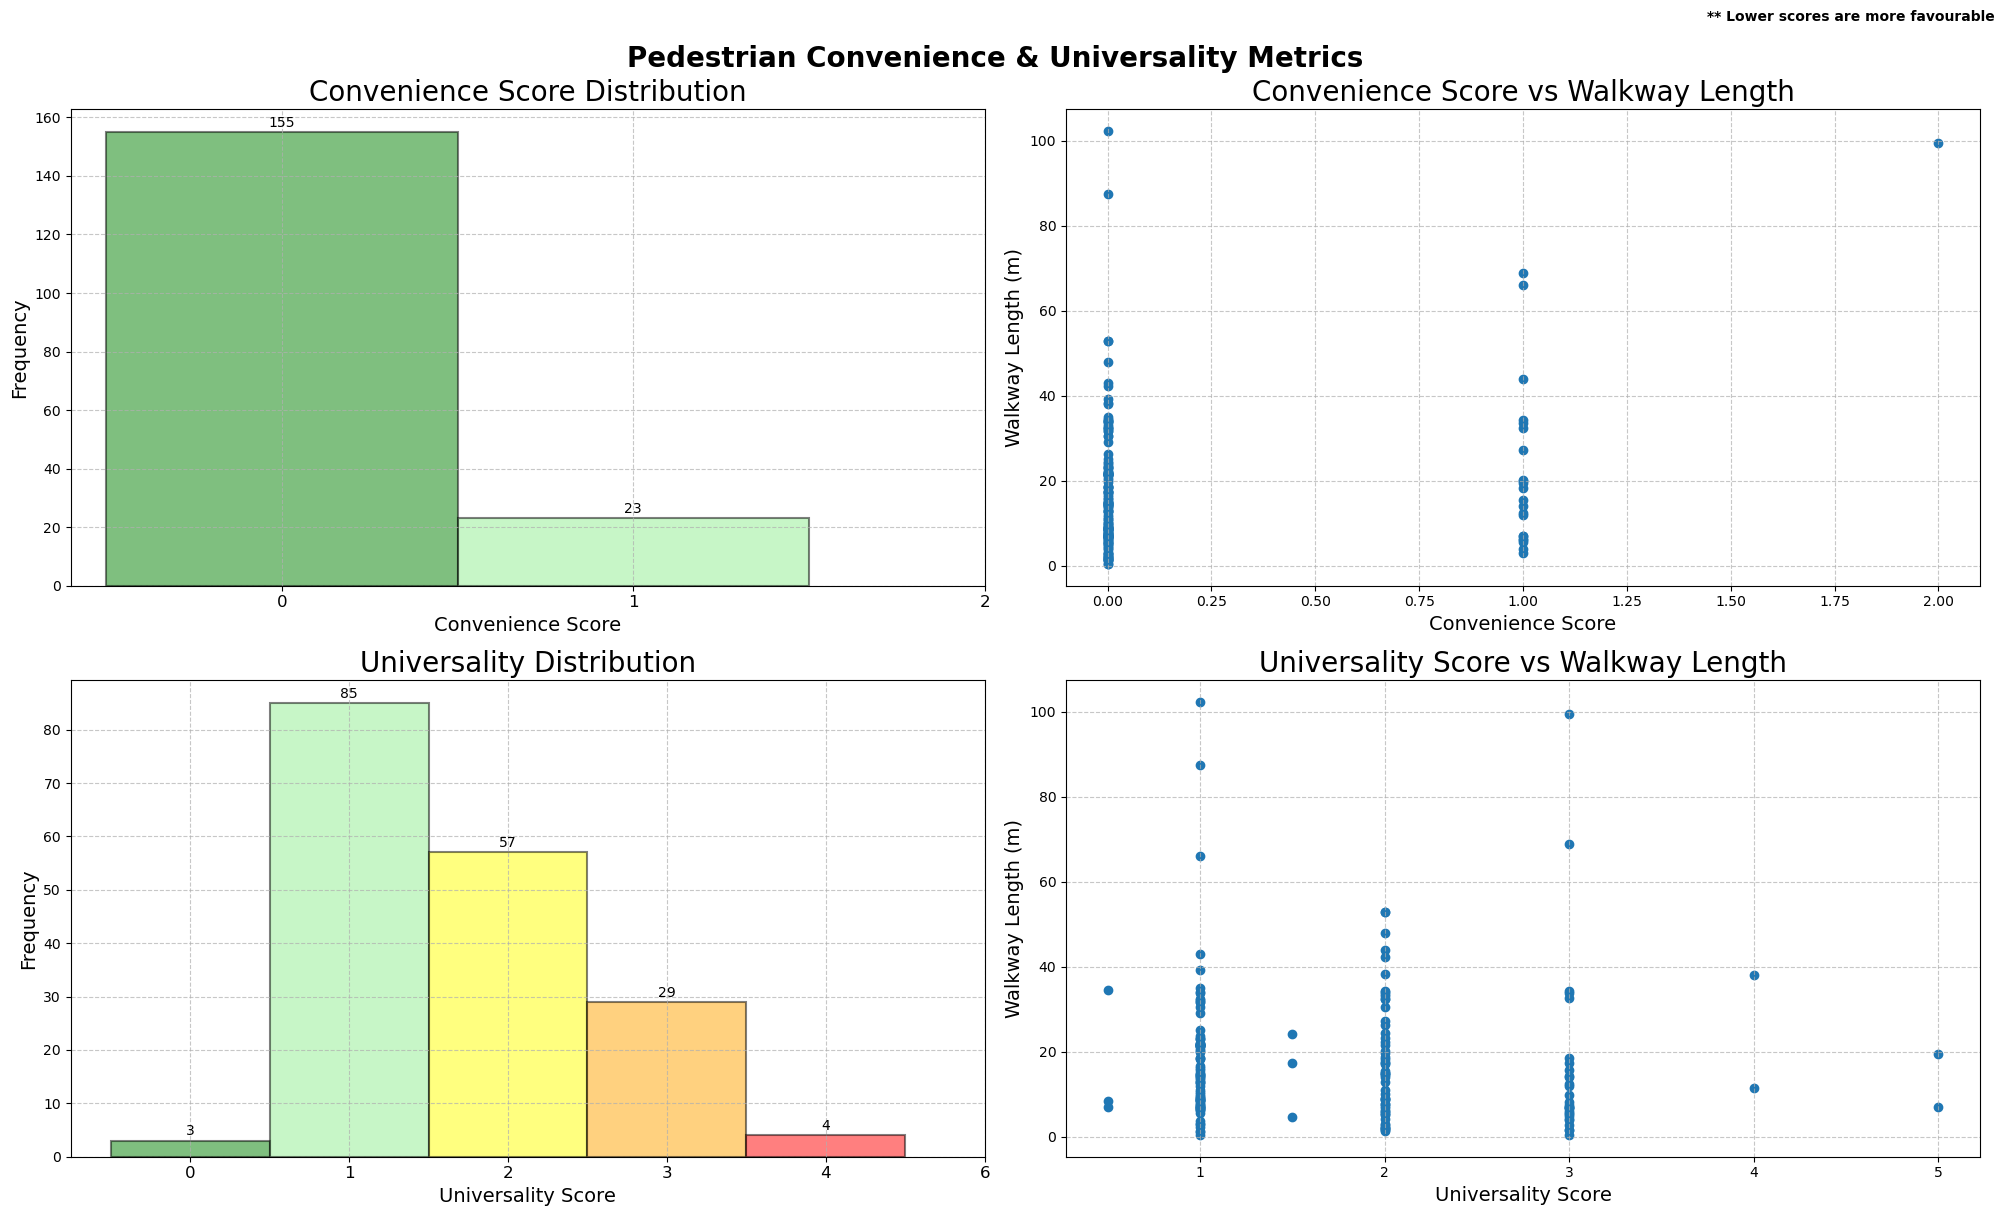

In [8]:
# Define bin edges for CON_SCO from 0 to the max CON_SCO plus 1, in steps of 1
bin_edges_conv = np.arange(0, max(pedDataframe['CON_SCO']) + 1, 1)

# Define bin edges for UNI_SCORE from 0 to the max UNI_SCORE plus 1, in steps of 1
bin_edges_uni = np.arange(0, max(pedDataframe['UNI_SCORE']) + 1, 1)



# Create a figure and a set of subplots with 2 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12) )

fig.suptitle('Pedestrian Convenience & Universality Metrics', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower scores are more favourable', ha='right', fontsize=10, fontweight='bold')



# Plotting the histogram for CON_SCO on the first subplot
counts_conv, bins_conv, patches_conv = axes[0,0].hist(x=pedDataframe['CON_SCO'], bins=bin_edges_conv, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[0,0].grid(True, linestyle='--', alpha=0.7)
axes[0,0].set_xlabel('Convenience Score', fontsize=14)
axes[0,0].set_ylabel('Frequency', fontsize=14)
axes[0,0].set_title('Convenience Score Distribution', fontsize=20)
axes[0,0].set_xticks(bin_edges_conv + 0.5)
axes[0,0].set_xticklabels(['0', '1', '2'], fontsize=12)

# Color code by score for CON_SCO
colors_conv = ['green', 'lightgreen', 'yellow', 'orange', 'red']
for score_bin, patch in zip(range(5), patches_conv):
    patch.set_facecolor(colors_conv[score_bin])

# Annotating the histogram for CON_SCO
for count, patch in zip(counts_conv, patches_conv):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_conv)
    axes[0,0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)



# Scatterplot for Convenience Rating vs Length
axes[0,1].scatter(pedDataframe['CON_SCO'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[0,1].grid(True, linestyle='--', alpha=0.7)
axes[0,1].set_xlabel('Convenience Score', fontsize=14)
axes[0,1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[0,1].set_title('Convenience Score vs Walkway Length', fontsize=20)



# Plotting the histogram for UNI_SCORE on the second subplot
counts_uni, bins_uni, patches_uni = axes[1,0].hist(x=pedDataframe['UNI_SCORE'], bins=bin_edges_uni, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[1,0].grid(True, linestyle='--', alpha=0.7)
axes[1,0].set_xlabel('Universality Score', fontsize=14)
axes[1,0].set_ylabel('Frequency', fontsize=14)
axes[1,0].set_title('Universality Distribution', fontsize=20)
axes[1,0].set_xticks(bin_edges_uni + 0.5)
axes[1,0].set_xticklabels(['0', '1', '2', '3', '4','6'], fontsize=12)


# Color code by score for UNI_SCORE
colors_uni = ['green', 'lightgreen', 'yellow', 'orange', 'red']
for score_bin, patch in zip(range(len(bin_edges_uni) - 1), patches_uni):
    patch.set_facecolor(colors_uni[score_bin])

# Annotating the histogram for UNI_SCORE
for count, patch in zip(counts_uni, patches_uni):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_uni)
    axes[1,0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)



# Scatterplot for Convenience Rating vs Length
axes[1,1].scatter(pedDataframe['UNI_SCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1,1].grid(True, linestyle='--', alpha=0.7)
axes[1,1].set_xlabel('Universality Score', fontsize=14)
axes[1,1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1,1].set_title('Universality Score vs Walkway Length', fontsize=20)



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Derived Network Conspicuous Ratings

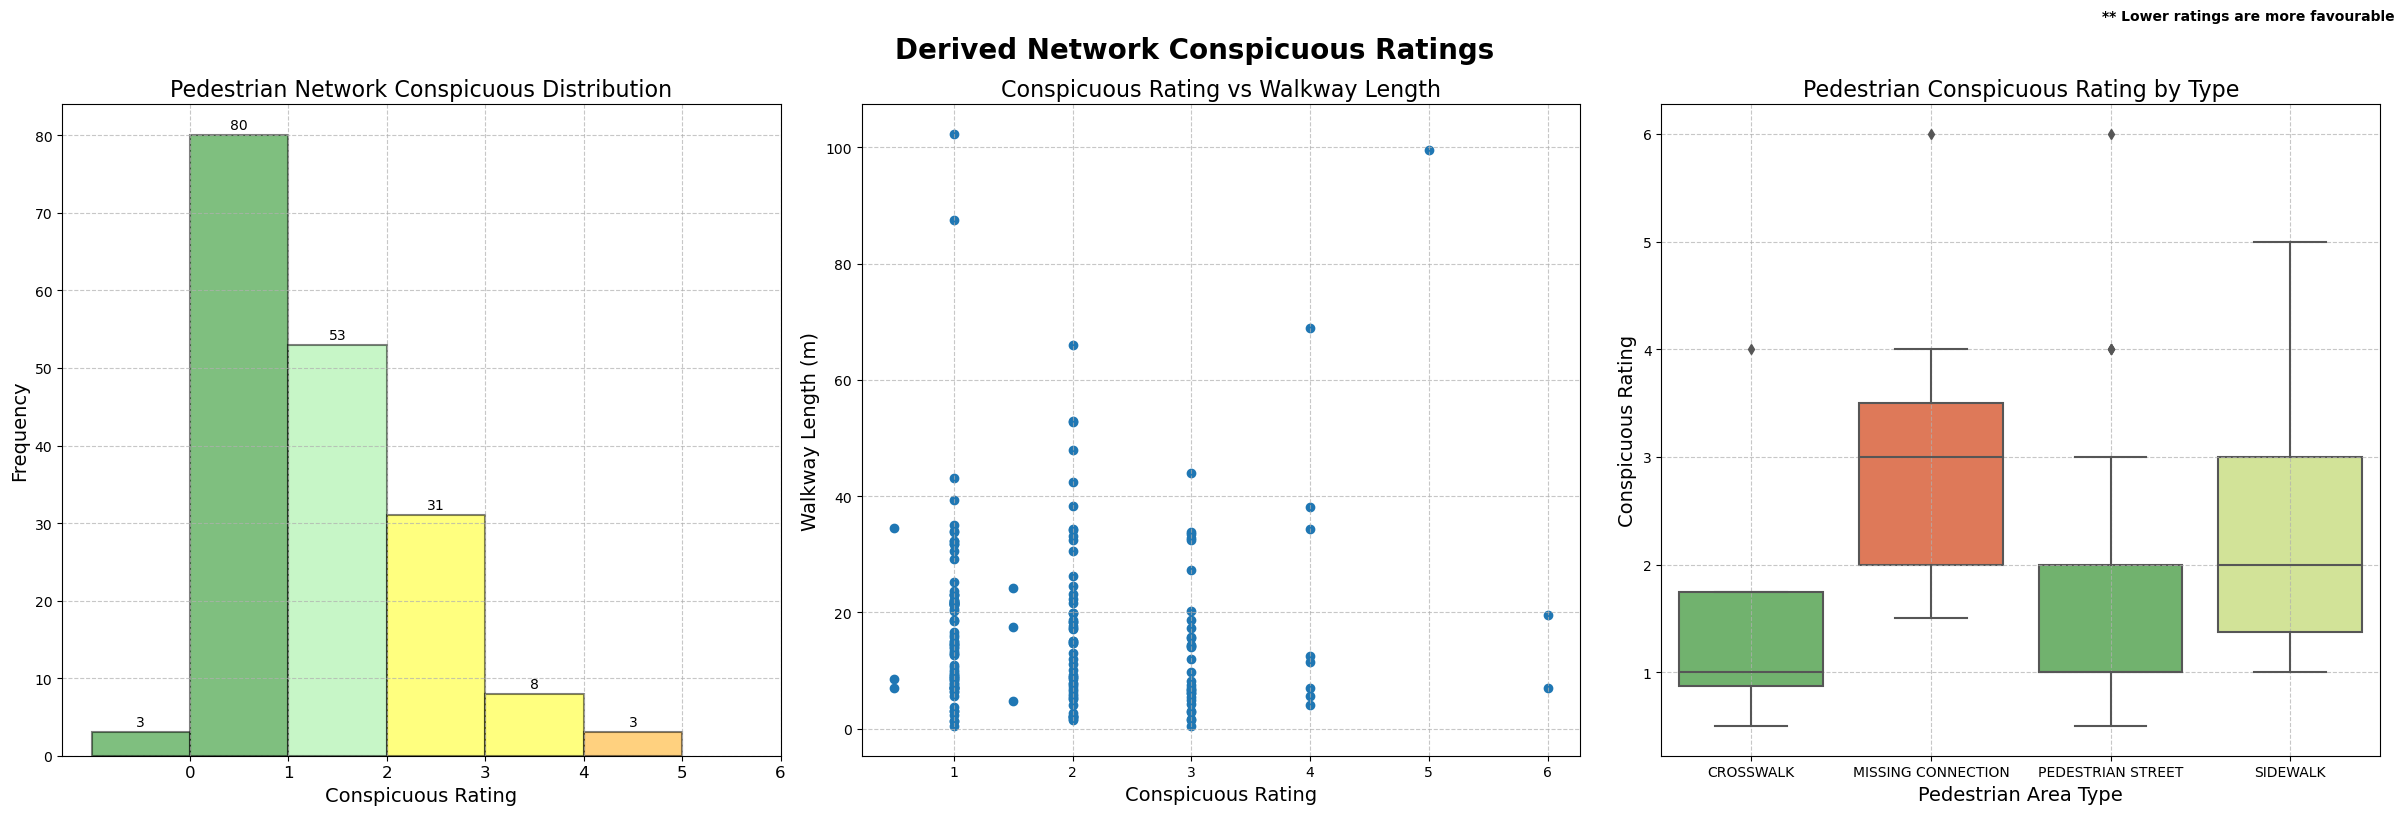

In [9]:
# Create a figure and a set of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8) )

fig.suptitle('Derived Network Conspicuous Ratings', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower ratings are more favourable', ha='right', fontsize=10, fontweight='bold')

bin_edges_conp = np.arange(0, max(pedDataframe['CON_SCORE']) + 1, 1)


# # Plotting the histogram for CON_SCORE on the third subplot
counts_conp, bins_conp, patches_conp = axes[0].hist(x=pedDataframe['CON_SCORE'], bins=bin_edges_conp, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Conspicuous Rating', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].set_title('Pedestrian Network Conspicuous Distribution', fontsize=16)
axes[0].set_xticks(bin_edges_conp + 1)
axes[0].set_xticklabels(['0', '1', '2', '3', '4','5','6'], fontsize=12)


# Color code by score for CON_SCORE
colors_conp = ['green', 'green','lightgreen','yellow', 'yellow', 'orange', 'red', 'red']
for score_bin, patch in zip(range(len(bin_edges_conp) - 1), patches_conp):
    patch.set_facecolor(colors_conp[score_bin])

# Annotating the histogram for CON_SCORE
for count, patch in zip(counts_conp, patches_conp):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_conp)
    axes[0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Scatterplot for Conspicuous Score vs Length
axes[1].scatter(pedDataframe['CON_SCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Conspicuous Rating', fontsize=14)
axes[1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1].set_title('Conspicuous Rating vs Walkway Length', fontsize=16)


# Boxplot creation

boxData = pedDataframe[['PED_NAME','CON_SCORE']]
grouped = boxData.groupby('PED_NAME')['CON_SCORE'].median()#.sort_values(ascending = False)

# Create a color palette from green (good) to red (bad)

palette = sns.color_palette("RdYlGn_r", len(grouped))
# Normalize the metric to get values between 0 and 1

normalized = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Prepare a color mapping based on normalized metric

color_mapping = normalized.apply(lambda x: palette[int(x * (len(palette) - 1))])

sns.boxplot(x='PED_NAME', y='CON_SCORE', data=boxData, order=color_mapping.index, palette=color_mapping,ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xlabel('Pedestrian Area Type', fontsize=14)
axes[2].set_ylabel('Conspicuous Rating', fontsize=14)
axes[2].set_title('Pedestrian Conspicuous Rating by Type', fontsize=16)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot

Derived Network Conspicuous Ratings

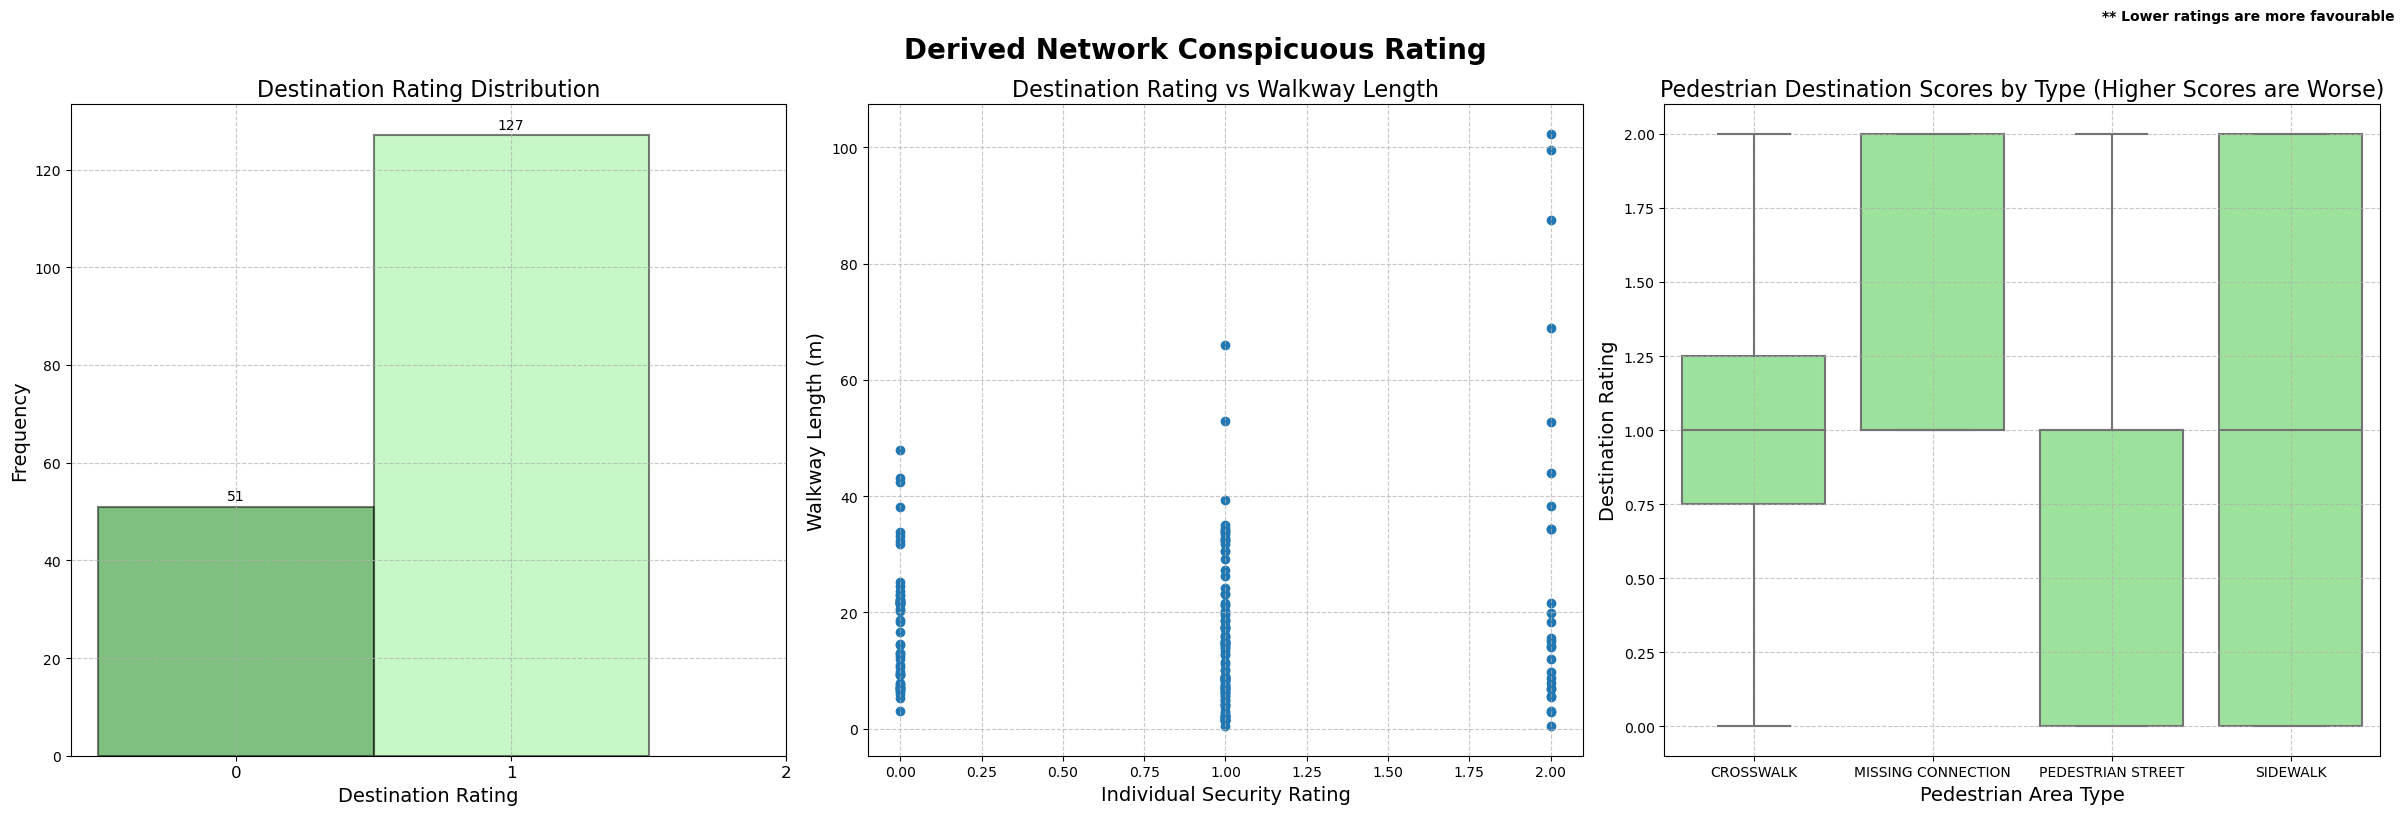

In [10]:
# Define bin edges for DEST_SCORE from 0 to the max DEST_SCORE plus 1, in steps of 1
bin_edges_dest = np.arange(0, max(pedDataframe['DEST_SCORE']) + 1, 1)



# Create a figure and a set of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8) )

fig.suptitle('Derived Network Conspicuous Rating', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower ratings are more favourable', ha='right', fontsize=10, fontweight='bold')

# Plotting the histogram for DEST_SCORE on the first subplot
counts_dest, bins_dest, patches_dest = axes[0].hist(x=pedDataframe['DEST_SCORE'], bins=bin_edges_dest, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Destination Rating', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].set_title('Destination Rating Distribution', fontsize=16)
axes[0].set_xticks(bin_edges_dest + 0.5)
axes[0].set_xticklabels(['0', '1', '2'], fontsize=12)

# Color code by score for DEST_SCORE
colors_dest = ['green', 'lightgreen', 'yellow', 'orange', 'red']
for score_bin, patch in zip(range(5), patches_dest):
    patch.set_facecolor(colors_dest[score_bin])

# Annotating the histogram for DEST_SCORE
for count, patch in zip(counts_dest, patches_dest):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_dest)
    axes[0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)


# Scatterplot for Destination Score vs Length
axes[1].scatter(pedDataframe['DEST_SCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Individual Security Rating', fontsize=14)
axes[1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1].set_title('Destination Rating vs Walkway Length', fontsize= 16)


# Boxplot creation 
boxData = pedDataframe[['PED_NAME','DEST_SCORE']]
grouped = boxData.groupby('PED_NAME')['DEST_SCORE'].median()#.sort_values(ascending = False)


normalized = (grouped - grouped.min()) / (grouped.max() - grouped.min())


sns.boxplot(x='PED_NAME', y='DEST_SCORE', data=boxData, order=color_mapping.index, color= 'lightgreen', ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xlabel('Pedestrian Area Type', fontsize=14)
axes[2].set_ylabel('Destination Rating', fontsize=14)
axes[2].set_title('Pedestrian Destination Scores by Type (Higher Scores are Worse)', fontsize=16)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Derived Network Aesthetics Ratings

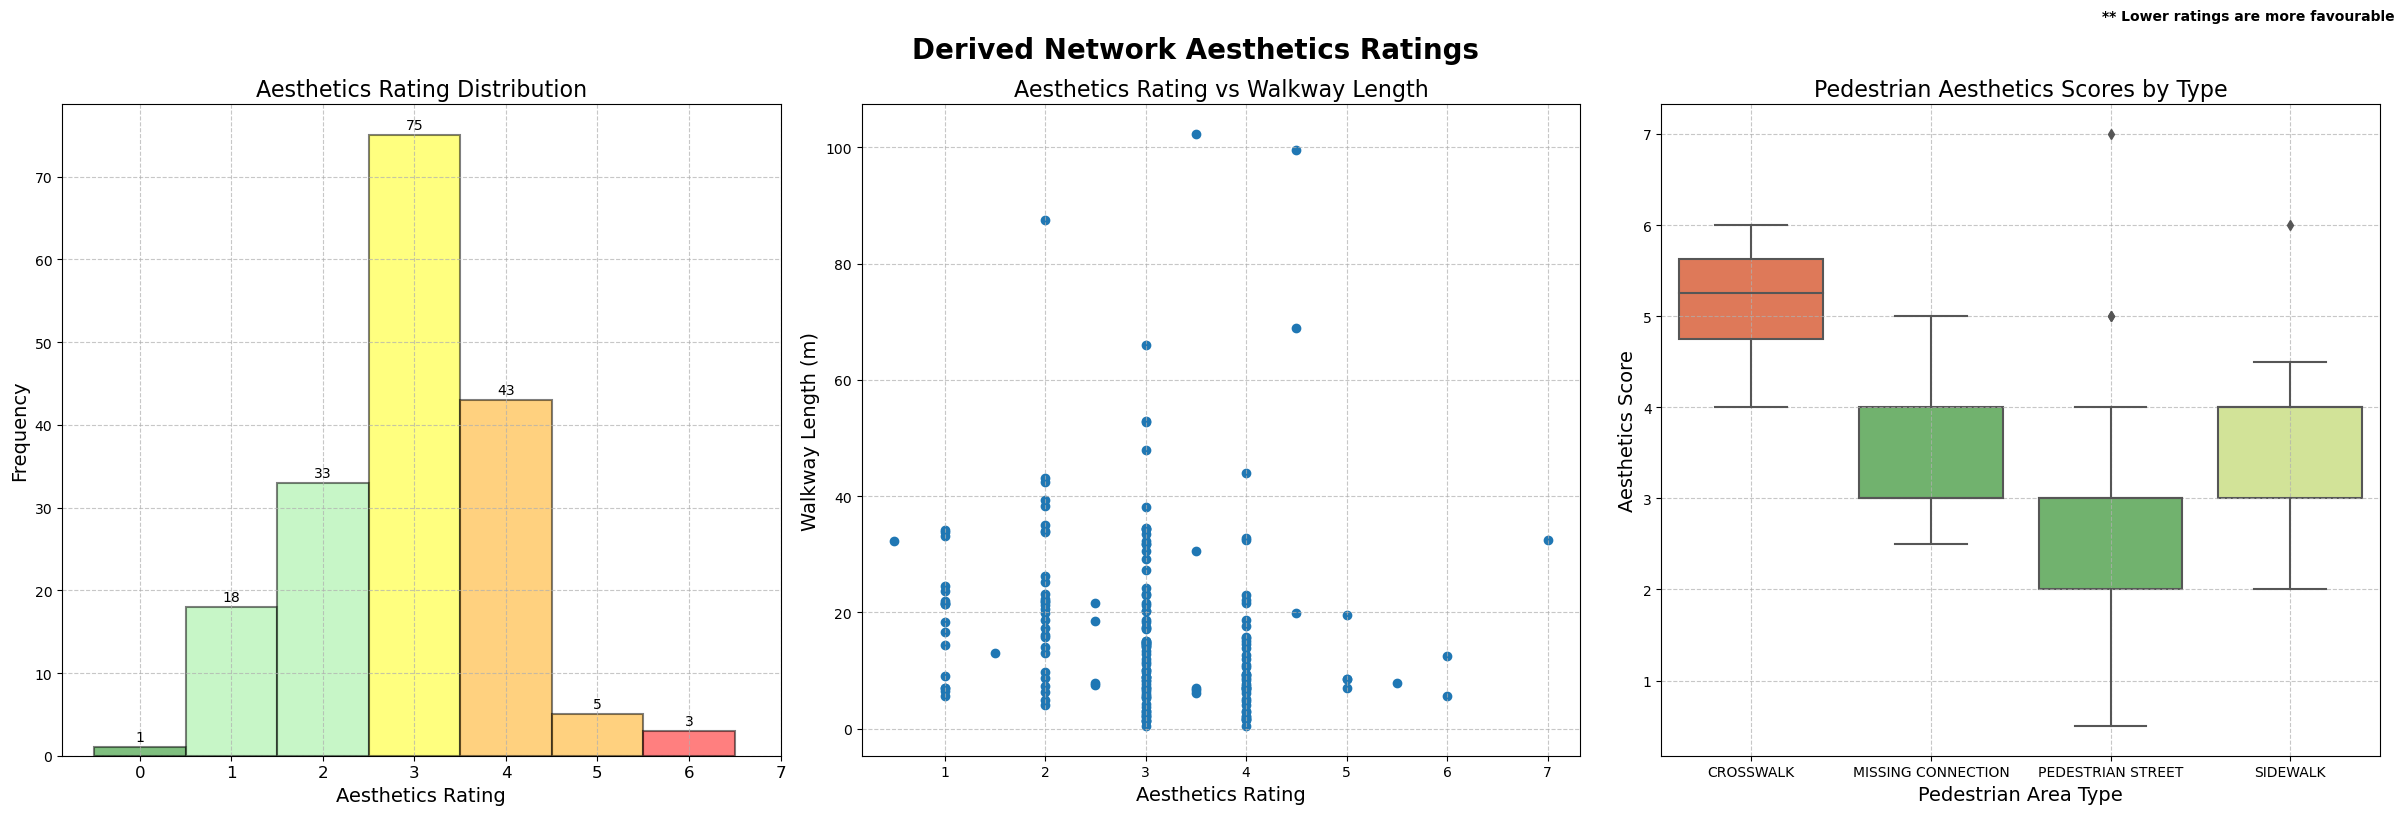

In [11]:
# Define bin edges for AES_SCORE from 0 to the max AES_SCORE plus 1, in steps of 1
bin_edges_dest = np.arange(0, max(pedDataframe['AES_SCORE']) + 1, 1)



# Create a figure and a set of subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8) )

fig.suptitle('Derived Network Aesthetics Ratings', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower ratings are more favourable', ha='right', fontsize=10, fontweight='bold')

# Plotting the histogram for AES_SCORE on the first subplot
counts_dest, bins_dest, patches_dest = axes[0].hist(x=pedDataframe['AES_SCORE'], bins=bin_edges_dest, color='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Aesthetics Rating', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].set_title('Aesthetics Rating Distribution', fontsize=16)
axes[0].set_xticks(bin_edges_dest + 0.5)
axes[0].set_xticklabels(['0', '1', '2','3','4','5','6','7'], fontsize=12)

# Color code by score for TRAF_SCORE
colors_dest = ['green', 'lightgreen','lightgreen', 'yellow', 'orange',  'orange','red']
for score_bin, patch in zip(range(7), patches_dest):
    patch.set_facecolor(colors_dest[score_bin])

# Annotating the histogram for TRAF_SCORE
for count, patch in zip(counts_dest, patches_dest):
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 0.005 * max(counts_dest)
    axes[0].text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Scatterplot for Aesthetics vs Length
axes[1].scatter(pedDataframe['AES_SCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Aesthetics Rating', fontsize=14)
axes[1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1].set_title('Aesthetics Rating vs Walkway Length', fontsize=16)

# Boxplot creation 

boxData = pedDataframe[['PED_NAME','AES_SCORE']]
grouped = boxData.groupby('PED_NAME')['AES_SCORE'].median()#.sort_values(ascending = False)

# Create a color palette from green (good) to red (bad)

palette = sns.color_palette("RdYlGn_r", len(grouped))
# Normalize the metric to get values between 0 and 1

normalized = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Prepare a color mapping based on normalized metric

color_mapping = normalized.apply(lambda x: palette[int(x * (len(palette) - 1))])

sns.boxplot(x='PED_NAME', y='AES_SCORE', data=boxData, order=color_mapping.index, palette= color_mapping, ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xlabel('Pedestrian Area Type', fontsize=14)
axes[2].set_ylabel('Aesthetics Score', fontsize=14)
axes[2].set_title('Pedestrian Aesthetics Scores by Type', fontsize=16)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Pedestrian Walkability Rating

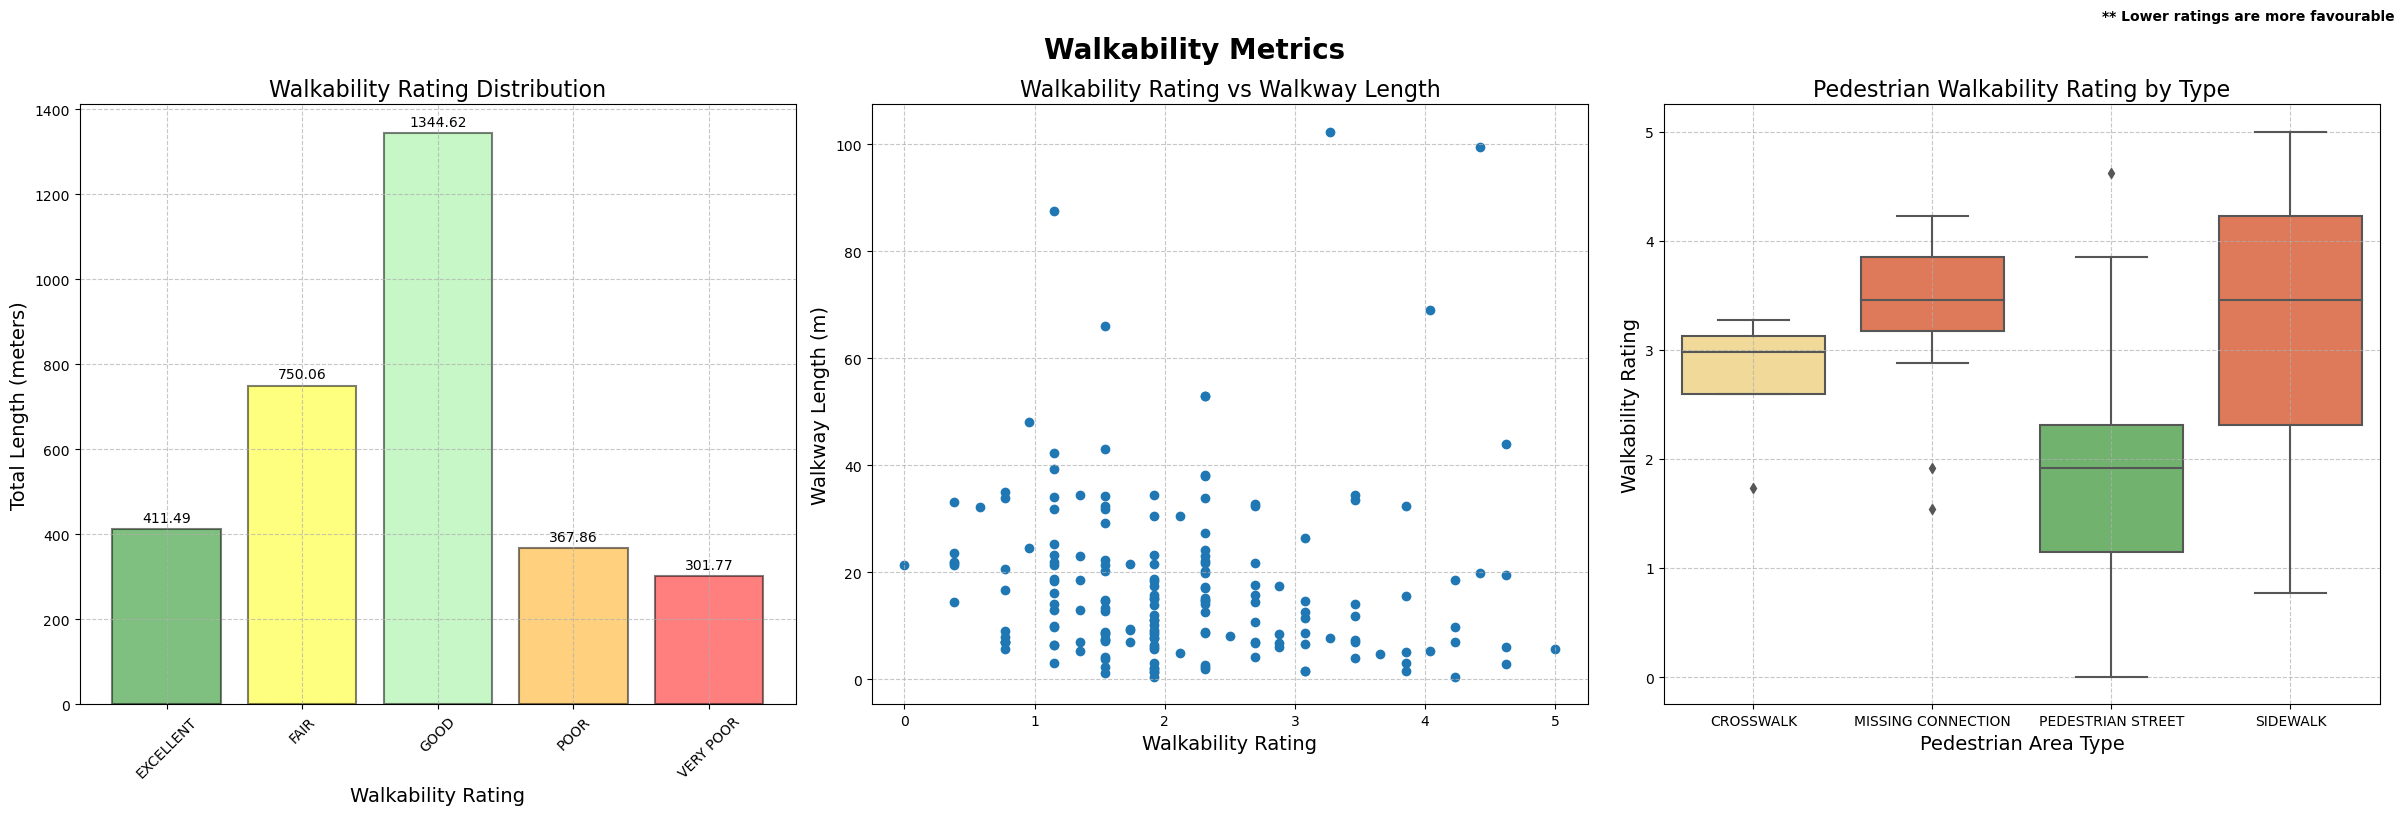

In [12]:
walkabilitySum = pedDataframe.groupby('WALK_CATEGORY')['SHAPE_Length'].sum()

walkColors = {'EXCELLENT': 'green', 'GOOD': 'lightgreen', 'FAIR': 'yellow', 'POOR': 'orange', 'VERY POOR': 'red'}

# Create a figure and a set of subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8) )

fig.suptitle('Walkability Metrics', fontsize=20, fontweight='bold' )
plt.figtext(1, 1, '** Lower ratings are more favourable', ha='right', fontsize=10, fontweight='bold')

# Plotting the histogram for walkabilitySum on the first subplot


bars = axes[0].bar( walkabilitySum.index ,walkabilitySum.values, color=[walkColors[cat] for cat in walkabilitySum.index], alpha=0.5, edgecolor='black', linewidth=1.5)
for bar in bars:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Walkability Rating', fontsize=14)
axes[0].set_ylabel('Total Length (meters)', fontsize=14)
axes[0].set_title('Walkability Rating Distribution', fontsize=16)
axes[0].set_xticklabels(walkabilitySum.index, rotation=45)

# Scatterplot for Walkability vs Length
axes[1].scatter(pedDataframe['WALK_TSCORE'],pedDataframe['SHAPE_Length'] , marker = 'o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Walkability Rating', fontsize=14)
axes[1].set_ylabel('Walkway Length (m)', fontsize=14)
axes[1].set_title('Walkability Rating vs Walkway Length', fontsize=16)


# Boxplot creation 

boxData = pedDataframe[['PED_NAME','WALK_TSCORE']]
grouped = boxData.groupby('PED_NAME')['WALK_TSCORE'].median()#.sort_values(ascending = False)

# Create a color palette from green (good) to red (bad)

palette = sns.color_palette("RdYlGn_r", len(grouped))
# Normalize the metric to get values between 0 and 1

normalized = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Prepare a color mapping based on normalized metric

color_mapping = normalized.apply(lambda x: palette[int(x * (len(palette) - 1))])

sns.boxplot(x='PED_NAME', y='WALK_TSCORE', data=boxData, order=color_mapping.index, palette= color_mapping, ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xlabel('Pedestrian Area Type', fontsize=14)
axes[2].set_ylabel('Walkability Rating', fontsize=14)
axes[2].set_title('Pedestrian Walkability Rating by Type', fontsize=16)
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Creating Map for spatial visualiation

In [13]:
pedLineShapefile = r"" #https://github.com/nehrou/walkability/blob/main/Ped%20Line%20Shapefile.zip

# Read the feature class into a GeoDataFrame
pedLineData = gpd.read_file(pedLineShapefile)
pedLineData = pedLineData.to_crs(epsg=4326)

lineJSON = pedLineData.to_json()
lineJSON = json.loads(lineJSON)

#Study area location
lat, lon = 10.6394, -61.4002

In [14]:
# Create empty map
m = folium.Map(location=[lat, lon], zoom_start=20,tiles='CartoDB Dark_Matter')


# create function to colour map based on results 
def get_color(WALK_CATEGORY):
    if WALK_CATEGORY == 'GOOD':
        return 'blue'
    elif WALK_CATEGORY == 'EXCELLENT':
        return 'green'
    elif WALK_CATEGORY == 'FAIR':
        return 'yellow'
    elif WALK_CATEGORY == 'POOR':
        return 'orange'
    elif WALK_CATEGORY == 'VERY POOR':
        return 'red'
    else:
        return 'gray'

In [15]:
# print(lineJSON[:2000]) # this was to check if the json files were being read properly

In [16]:
# Add the GeoJSON layer
folium.GeoJson(
    lineJSON,
    style_function = lambda feature: { 
                'color': get_color(feature ['properties']['WALK_CATEG']),
                #    'color':' black ',
                   'weight':2,
                   'dashArray': '5, 5',
                   'fillOpacity':0.7,
                },
                tooltip=folium.GeoJsonTooltip(
                    fields=['WALK_TSCOR'],
                    aliases=['Walkability Score'],
                    localize= True
                )              
).add_to(m)


# Add a title using folium.Html
title_html = """
    <div style="
        position: absolute;
        top: 10px;
        left: 50%;
        transform: translateX(-50%);
        z-index: 1000;
        background-color: rgba(255, 255, 255, 0.8);
        padding: 10px;
        font-size: 18px;
        font-family: 'Arial', sans-serif;
        text-align: center;
        "><b>Walkability Results</b></div>
    """
m.get_root().html.add_child(folium.Element(title_html))

#Add Lat long pop up
folium.LatLngPopup().add_to(m)


#Display Map
m